# MTLN Project - Time Series Analysis

Interactive notebook for exploring subscription time series data.

## Setup

In [ ]:
import sys
from pathlib import Path
import importlib

# Add src to path
PROJECT_ROOT = Path.cwd().parent if Path.cwd().name == 'research' else Path.cwd()
sys.path.insert(0, str(PROJECT_ROOT / 'src'))

# Import and reload to ensure we get the latest version
import METLN.timeseries
importlib.reload(METLN.timeseries)
from METLN.timeseries import TimeSeriesAnalyzer

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ Setup complete!")
print(f"📁 Data file: {METLN.timeseries.CLEAN_FILE}")
print(f"   File exists: {METLN.timeseries.CLEAN_FILE.exists()}")

✅ Setup complete!


## Initialize Analyzer

In [19]:
# Initialize the analyzer
analyzer = TimeSeriesAnalyzer()

# Load data
df = analyzer.load_data()

print(f"\nData Shape: {df.shape}")
print(f"Date Range: {df['date_of_extract'].min()} to {df['date_of_extract'].max()}")
print(f"\nColumns: {df.columns.tolist()}")

[2025-11-29 16:19:05,337] : TimeSeriesAnalyzer initialized. Output directory: /Users/ashish/Desktop/MTLN_PROJECT/outputs/timeseries:
[2025-11-29 16:19:05,338] : Loading data from /Users/ashish/Desktop/MTLN_PROJECT/data/processed/clean_data.csv:
[2025-11-29 16:19:05,338] : Loading data from /Users/ashish/Desktop/MTLN_PROJECT/data/processed/clean_data.csv:
[2025-11-29 16:19:05,819] : Loaded 572,292 rows and 16 columns:
[2025-11-29 16:19:05,819] : Loaded 572,292 rows and 16 columns:
[2025-11-29 16:19:06,100] : Date range: 2024-02-01 00:00:00 to 2024-10-01 00:00:00:
[2025-11-29 16:19:06,100] : Date range: 2024-02-01 00:00:00 to 2024-10-01 00:00:00:
[2025-11-29 16:19:06,102] : Unique extraction dates: 9:
[2025-11-29 16:19:06,102] : Unique extraction dates: 9:



Data Shape: (572292, 16)
Date Range: 2024-02-01 00:00:00 to 2024-10-01 00:00:00

Columns: ['date_of_extract', 'Publication', 'AccoutID', 'Status', 'Bill Method', 'Dist ID', 'Route ID', 'Day pattern', 'City', 'State', 'Zip', 'Rate Code', 'LastStartDate', 'OriginalStartDate', 'OccupantID', 'RouteType ID']


## Daily Aggregations

In [11]:
# Create daily aggregations
daily_stats = analyzer.create_daily_aggregations()

# Display
print("Daily Statistics:")
display(daily_stats)

[2025-11-29 16:08:57,964] : Creating daily aggregations...:
[2025-11-29 16:08:58,067] : Created daily aggregations for 9 days:
[2025-11-29 16:08:58,067] : Created daily aggregations for 9 days:


Daily Statistics:


,total_subscriptions,active_subscriptions,unique_publications,unique_cities,unique_states,unique_routes,inactive_subscriptions,activation_rate
date_of_extract,,,,,,,,
2024-02-01,62839,0,5,2663,63,246,62839,0.0
2024-03-01,62977,0,5,3143,5197,2883,62977,0.0
2024-04-01,63106,0,5,3160,936,2896,63106,0.0
2024-05-01,63285,0,5,3183,5212,2915,63285,0.0
2024-06-01,63484,0,5,3206,939,2932,63484,0.0
2024-07-01,63737,0,5,3252,940,2961,63737,0.0
2024-08-01,63975,0,5,3301,941,2992,63975,0.0
2024-09-01,64377,0,5,3388,943,3054,64377,0.0
2024-10-01,64512,0,5,2849,64,238,64512,0.0


## Growth Metrics

In [4]:
# Calculate growth metrics
growth = analyzer.calculate_growth_metrics()

# Display growth metrics
print("Growth Metrics:")
display(growth[['total_subscriptions', 'dod_change', 'dod_pct_change']])

[2025-11-29 15:41:37,775] : Calculating growth metrics...:


Growth Metrics:


,total_subscriptions,dod_change,dod_pct_change
date_of_extract,,,
2024-02-01,62839,NaN,NaN
2024-03-01,62977,138.0,0.219609
2024-04-01,63106,129.0,0.204837
2024-05-01,63285,179.0,0.283650
2024-06-01,63484,199.0,0.314451
2024-07-01,63737,253.0,0.398526
2024-08-01,63975,238.0,0.373409
2024-09-01,64377,402.0,0.628370
2024-10-01,64512,135.0,0.209702


## Trend Analysis

In [5]:
# Analyze trends
trends = analyzer.analyze_trends()

# Display trends
print("Trend Analysis Results:")
for key, value in trends.items():
    if isinstance(value, (int, float)):
        print(f"  {key:25s}: {value:,.2f}")
    else:
        print(f"  {key:25s}: {value}")

[2025-11-29 15:41:42,444] : Analyzing trends...:
[2025-11-29 15:41:42,445] : Trend Analysis Results::
[2025-11-29 15:41:42,446] :   overall_trend: Growing:
[2025-11-29 15:41:42,446] :   avg_daily_growth: 185.89:
[2025-11-29 15:41:42,447] :   total_growth: 1673:
[2025-11-29 15:41:42,447] :   growth_rate: 2.66:
[2025-11-29 15:41:42,448] :   volatility: 90.98:
[2025-11-29 15:41:42,445] : Trend Analysis Results::
[2025-11-29 15:41:42,446] :   overall_trend: Growing:
[2025-11-29 15:41:42,446] :   avg_daily_growth: 185.89:
[2025-11-29 15:41:42,447] :   total_growth: 1673:
[2025-11-29 15:41:42,447] :   growth_rate: 2.66:
[2025-11-29 15:41:42,448] :   volatility: 90.98:


Trend Analysis Results:
  overall_trend            : Growing
  avg_daily_growth         : 185.89
  total_growth             : 1673
  growth_rate              : 2.66
  volatility               : 90.98


## Visualizations

### Overall Trends

[2025-11-26 16:10:06,901] : Creating daily aggregations...:
[2025-11-26 16:10:07,010] : Created daily aggregations for 9 days:
[2025-11-26 16:10:07,010] : Calculating growth metrics...:
[2025-11-26 16:10:07,012] : Creating trend visualizations...:


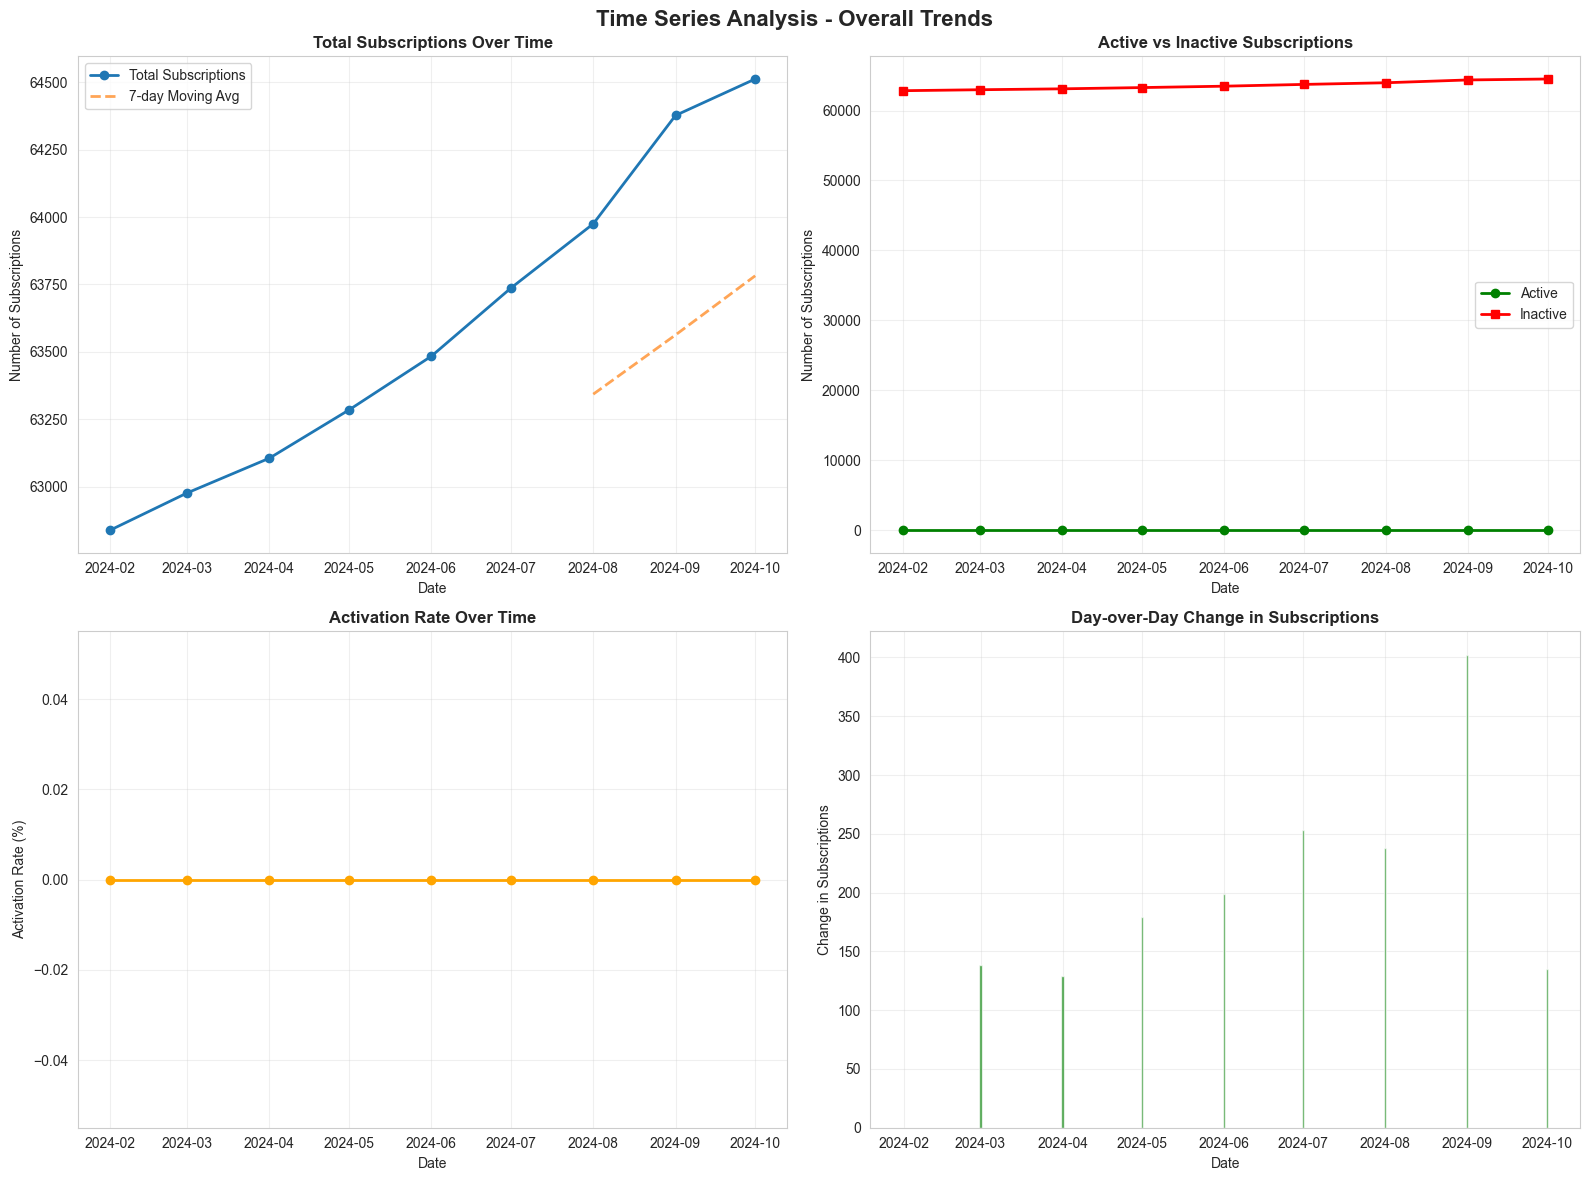

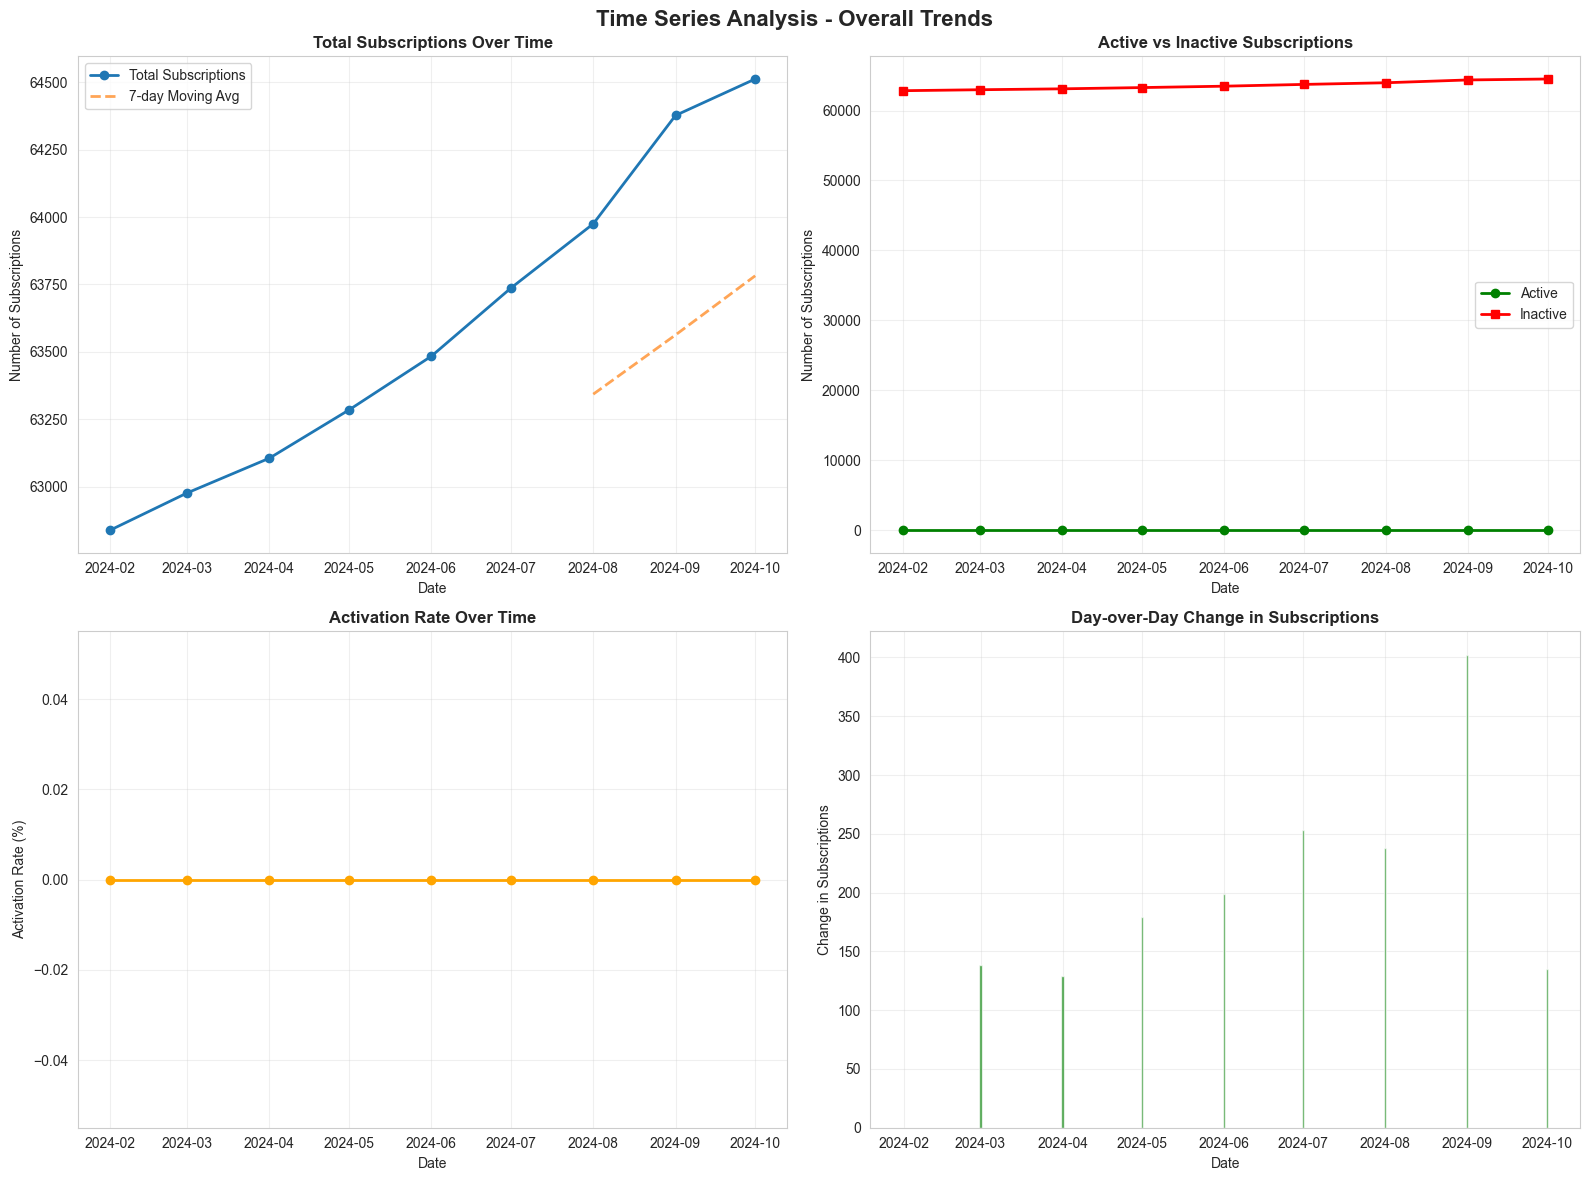

In [20]:
# Plot overall trends
analyzer.plot_overall_trends(save=False)

### Status Analysis

[2025-11-26 16:06:14,285] : Analyzing by subscription status...:
[2025-11-26 16:06:14,323] : Creating status analysis visualizations...:


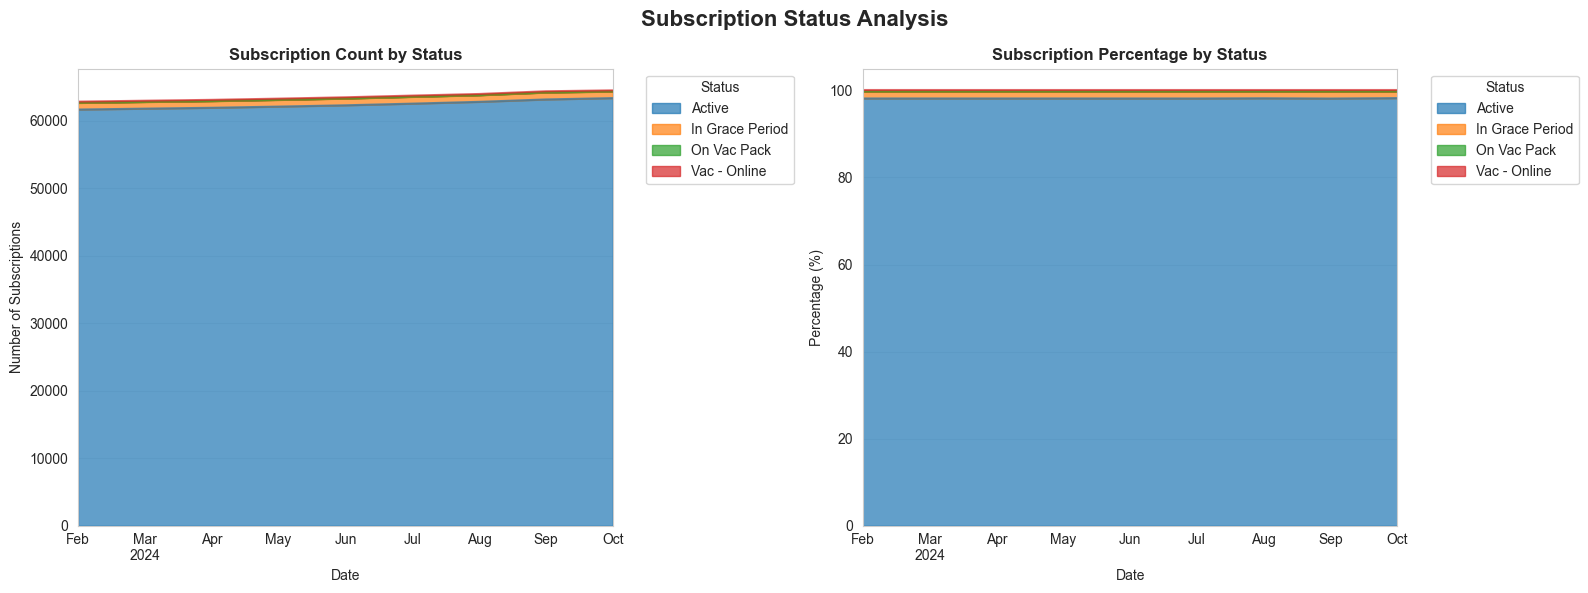

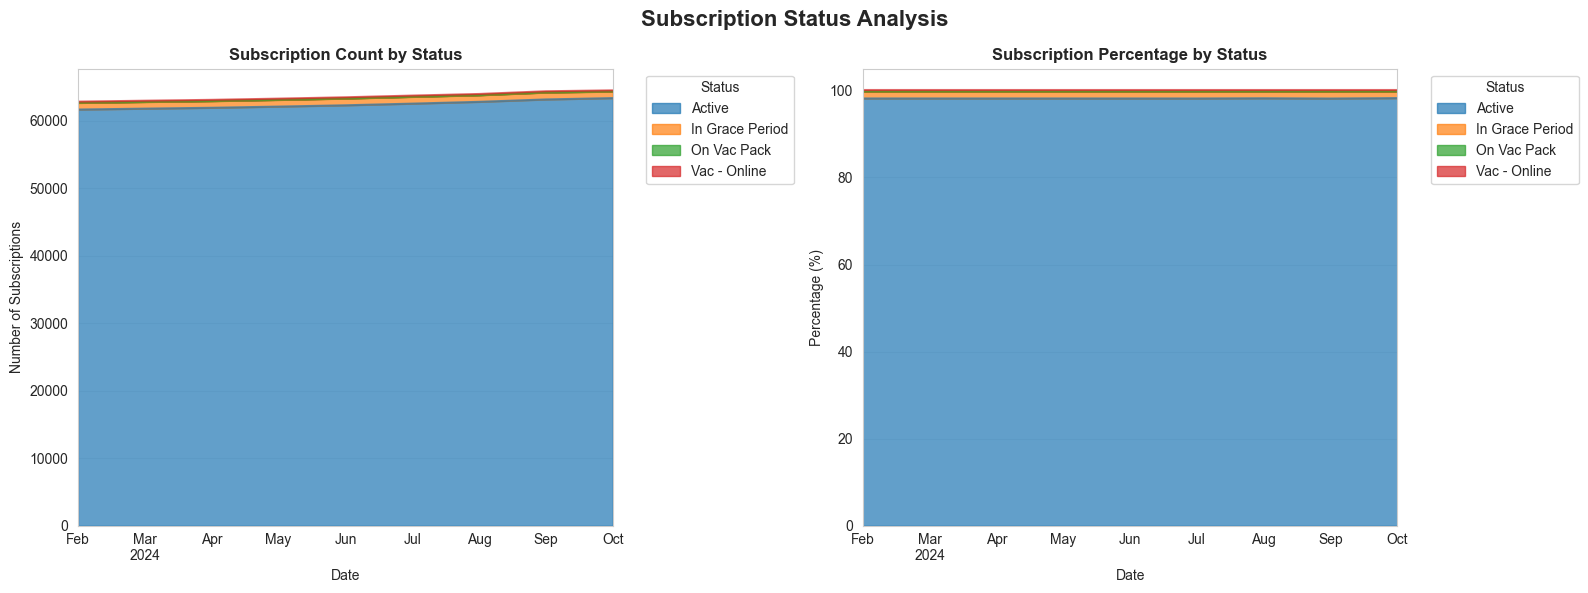

In [7]:
# Plot status analysis
analyzer.plot_status_analysis(save=False)

### Publication Trends

[2025-11-26 16:06:17,016] : Analyzing by publication...:
[2025-11-26 16:06:17,091] : Creating publication trends visualization (top 10)...:


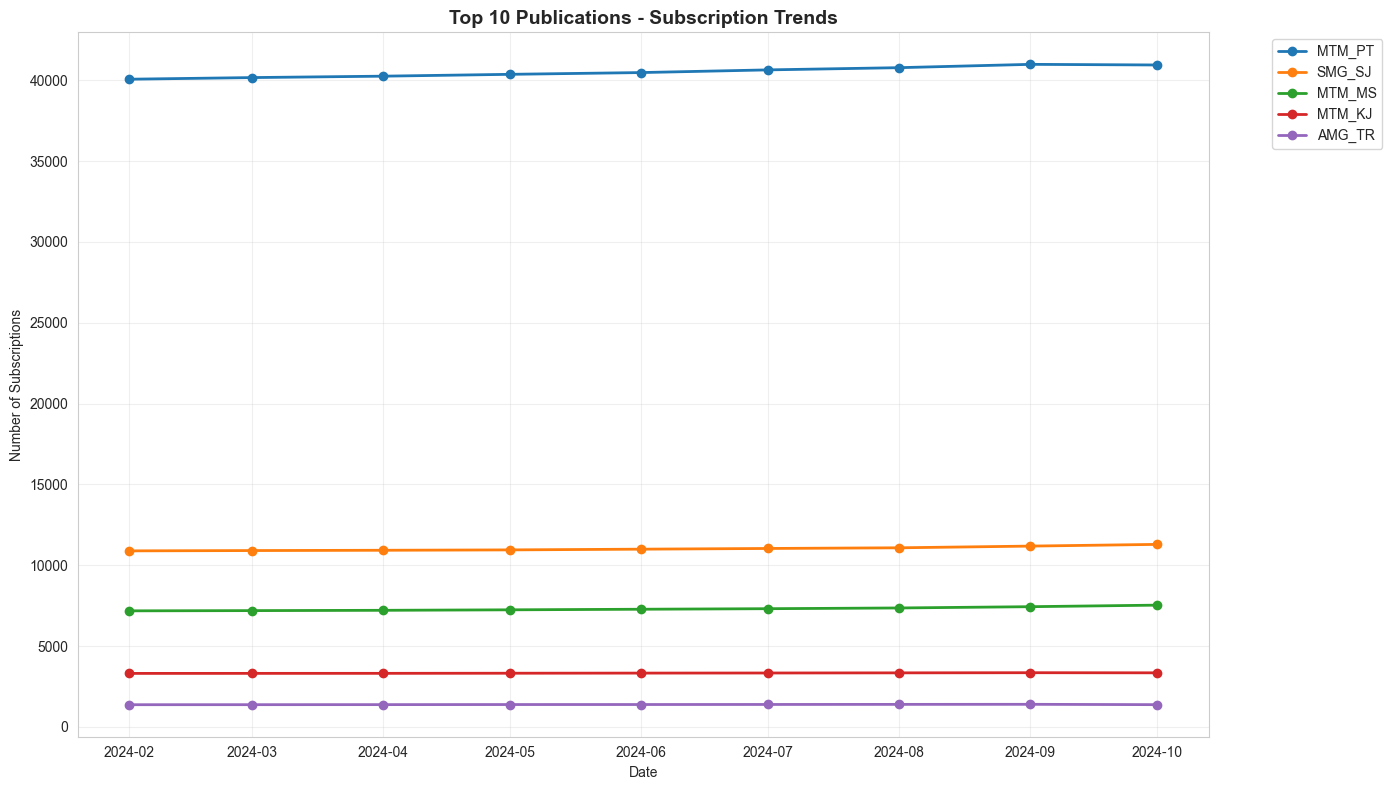

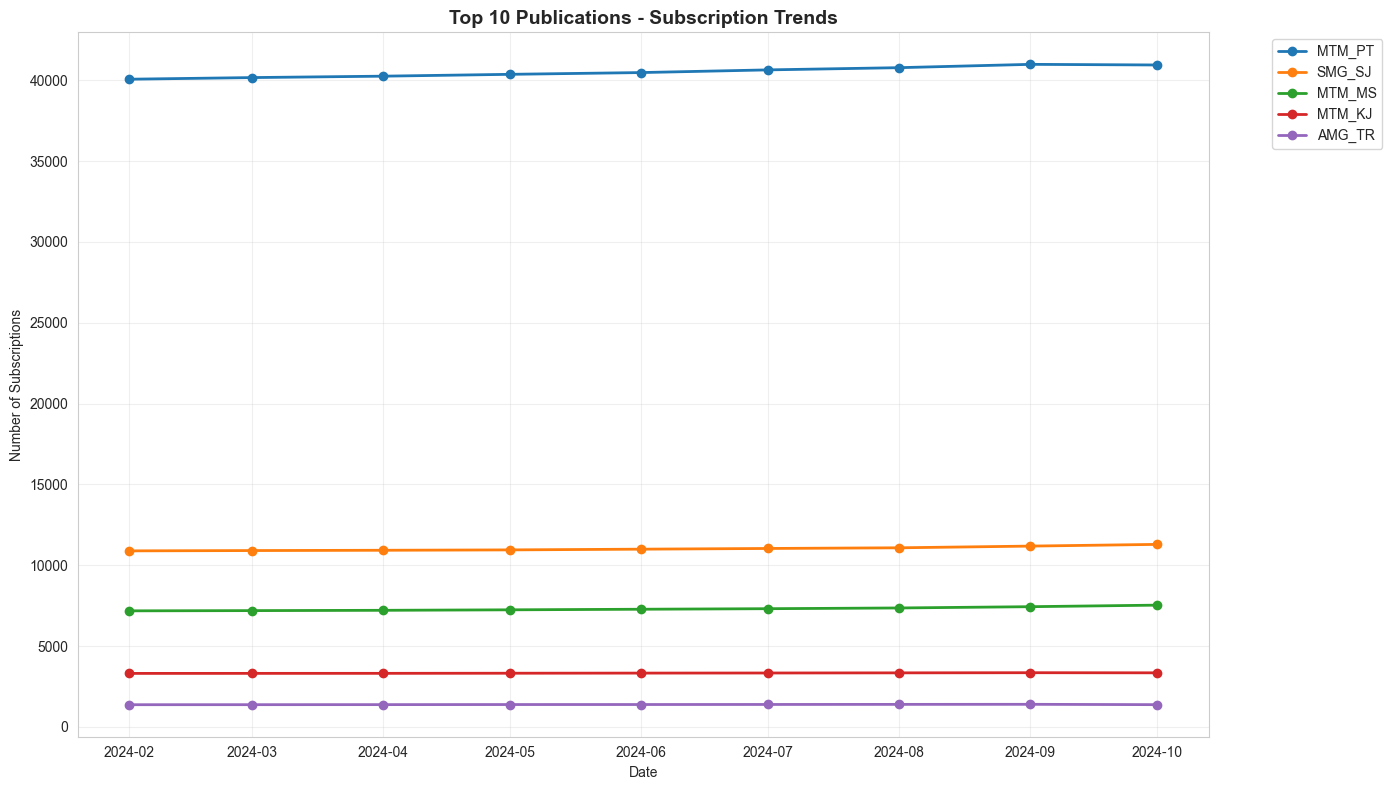

In [8]:
# Plot publication trends (top 10)
analyzer.plot_publication_trends(top_n=10, save=False)

### Geographic Distribution

[2025-11-26 16:06:20,797] : Analyzing by geography...:
[2025-11-26 16:06:20,886] : Creating geographic distribution visualizations...:


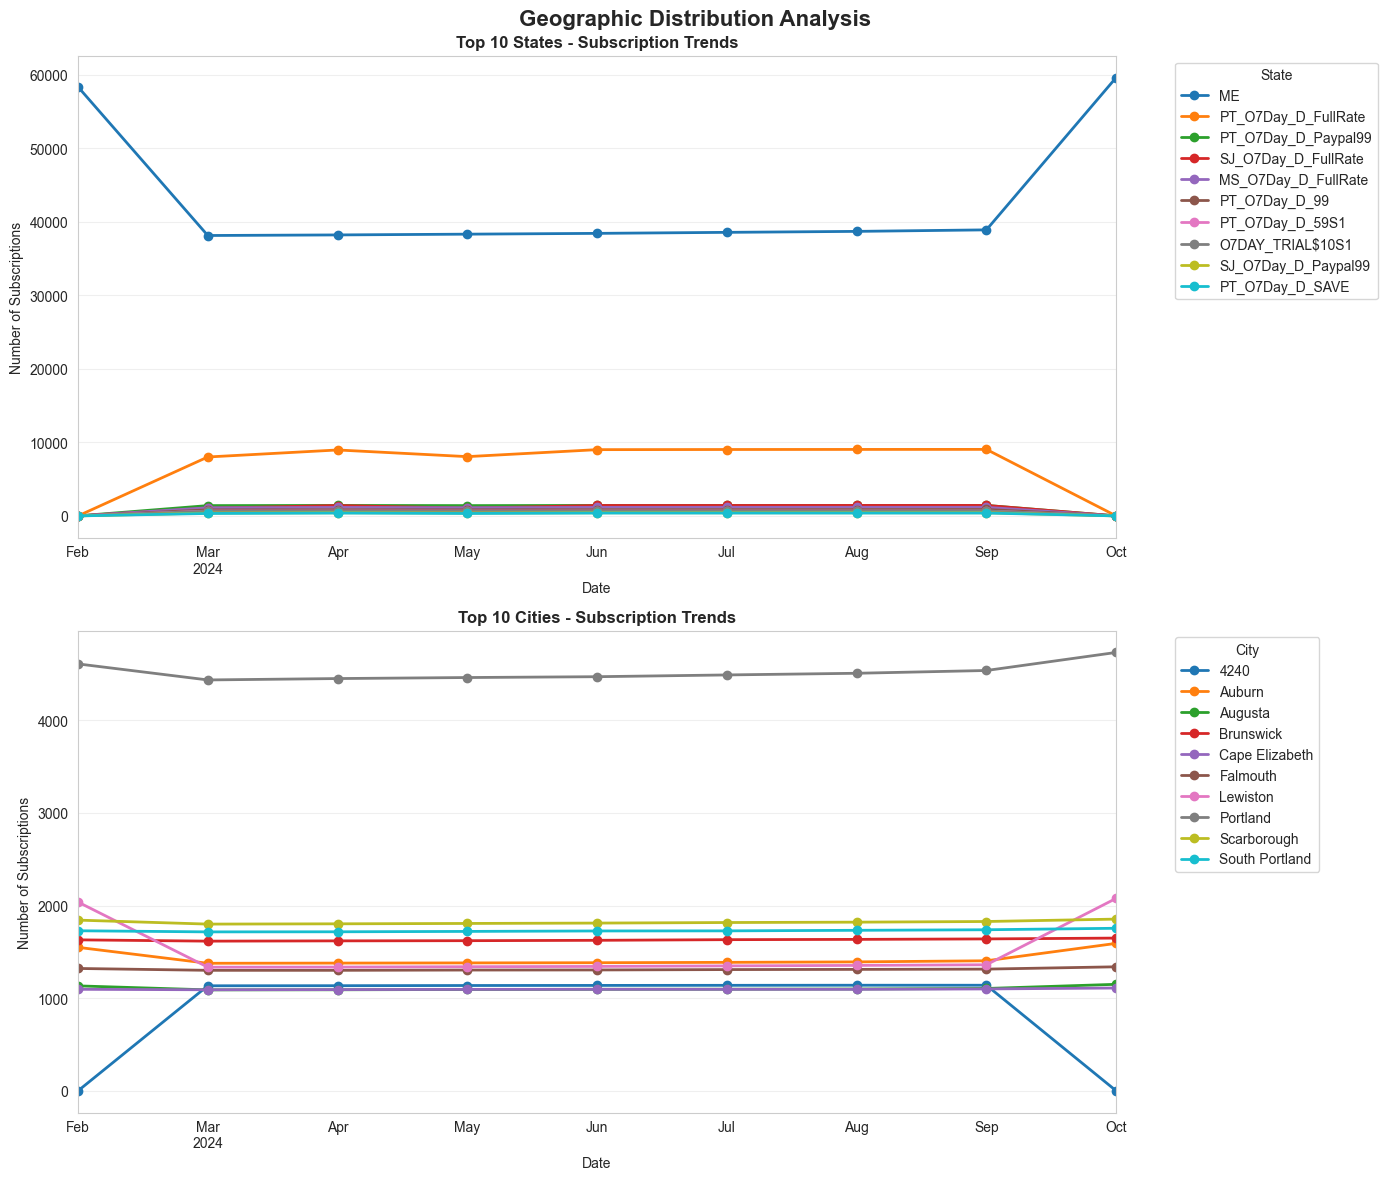

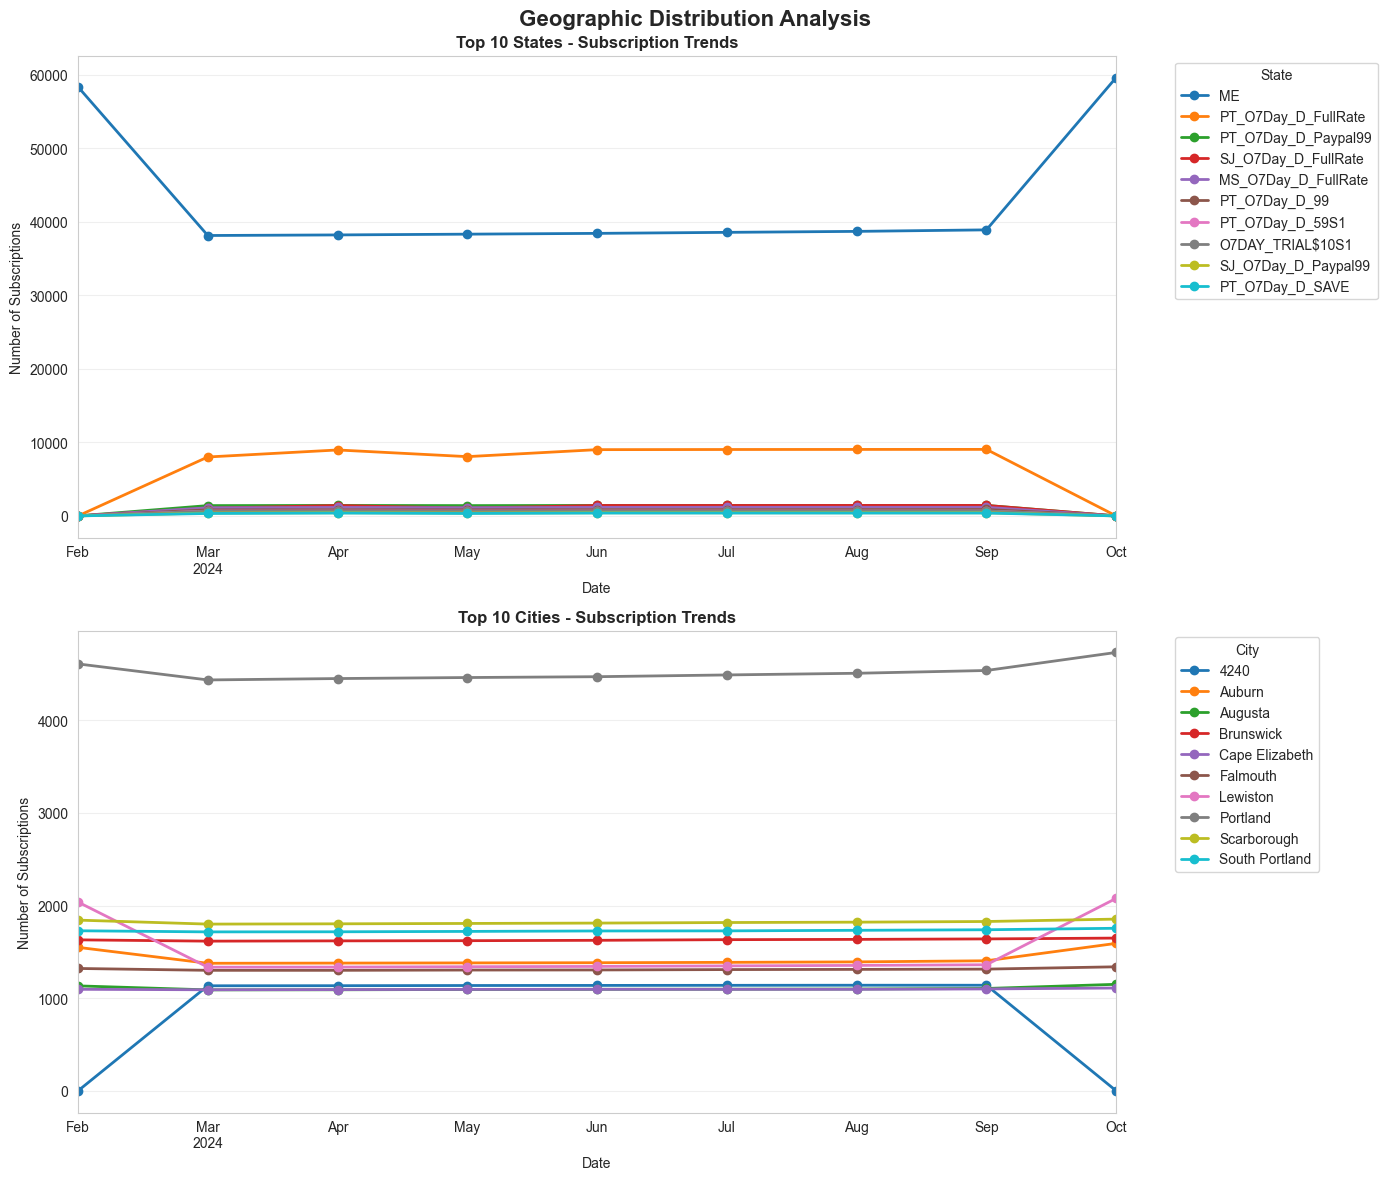

In [9]:
# Plot geographic distribution
analyzer.plot_geographic_distribution(save=False)

## Anomaly Detection

In [10]:
# Detect anomalies
anomalies = analyzer.detect_anomalies(threshold=2)

if len(anomalies) > 0:
    print(f"Found {len(anomalies)} anomalies:")
    display(anomalies[['total_subscriptions', 'z_score']])
else:
    print("No anomalies detected.")

[2025-11-26 16:06:27,604] : Detecting anomalies (threshold: 2 std devs)...:
[2025-11-26 16:06:27,608] : Found 0 anomalies:


No anomalies detected.


## Summary Report

In [11]:
# Generate summary report
report = analyzer.generate_summary_report()

[2025-11-26 16:06:31,701] : Generating summary report...:
[2025-11-26 16:06:31,702] : Analyzing trends...:
[2025-11-26 16:06:31,703] : Trend Analysis Results::
[2025-11-26 16:06:31,703] :   overall_trend: Growing:
[2025-11-26 16:06:31,704] :   avg_daily_growth: 185.89:
[2025-11-26 16:06:31,704] :   total_growth: 1673:
[2025-11-26 16:06:31,704] :   growth_rate: 2.66:
[2025-11-26 16:06:31,705] :   volatility: 90.98:
[2025-11-26 16:06:31,817] : Report saved to /Users/ashish/Desktop/MTLN_PROJECT/outputs/timeseries/summary_report.txt:



TIME SERIES ANALYSIS SUMMARY REPORT

📊 DATA SUMMARY
--------------------------------------------------------------------------------
  Total Records: 572,292
  Date Range: 2024-02-01 00:00:00 to 2024-10-01 00:00:00
  Unique Dates: 9
  Unique Accounts: 65,856
  Unique Publications: 5
  Unique States: 5,458
  Unique Cities: 5,877

📈 SUBSCRIPTION STATUS
--------------------------------------------------------------------------------
  Total Subscriptions: 572,292
  Active Subscriptions: 0
  Inactive Subscriptions: 572,292
  Activation Rate: 0.00%

📉 TREND ANALYSIS
--------------------------------------------------------------------------------
  Overall Trend: Growing
  Avg Daily Growth: 185.89
  Total Growth: 1673
  Growth Rate: 2.66
  Volatility: 90.98

📰 TOP 10 PUBLICATIONS
--------------------------------------------------------------------------------
   1. MTM_PT              : 364,713 subscriptions
   2. SMG_SJ              : 99,301 subscriptions
   3. MTM_MS              : 65,786

## Custom Analysis

### Explore Specific Publications

In [12]:
# Get publication time series
pub_ts = analyzer.analyze_by_publication()

# Show top publications
top_pubs = pub_ts.sum().nlargest(5)
print("Top 5 Publications by Total Subscriptions:")
print(top_pubs)

[2025-11-26 16:06:38,782] : Analyzing by publication...:


Top 5 Publications by Total Subscriptions:
Publication
MTM_PT    364713
SMG_SJ     99301
MTM_MS     65786
MTM_KJ     30000
AMG_TR     12492
dtype: int64


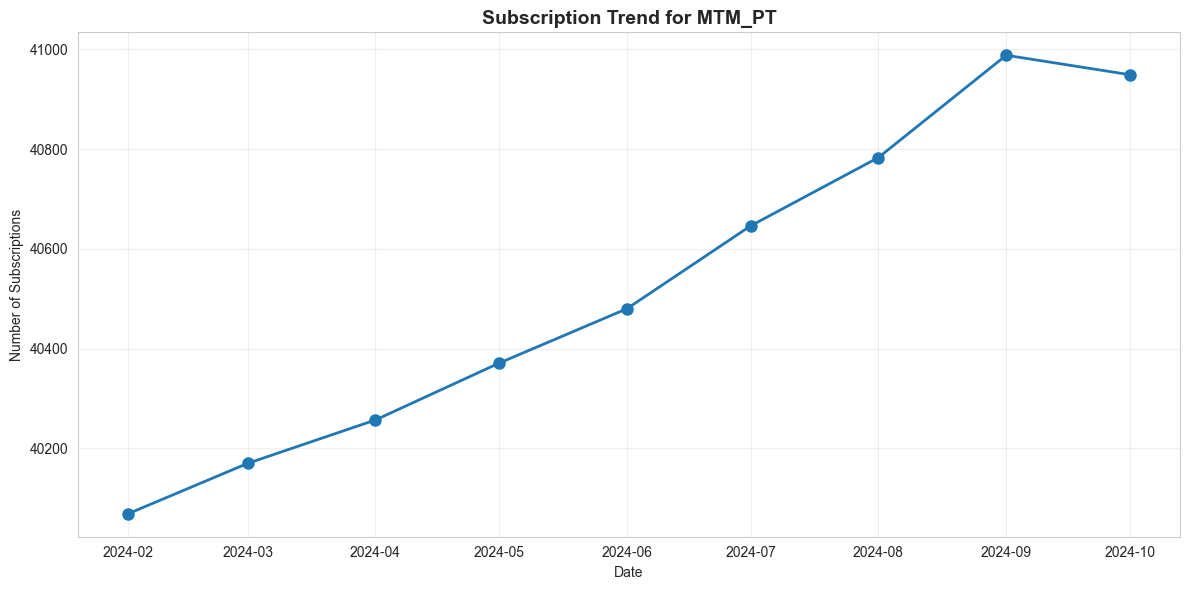

In [13]:
# Plot specific publication
pub_name = top_pubs.index[0]  # Top publication

plt.figure(figsize=(12, 6))
plt.plot(pub_ts.index, pub_ts[pub_name], marker='o', linewidth=2, markersize=8)
plt.title(f'Subscription Trend for {pub_name}', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Subscriptions')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Explore Geographic Trends

In [14]:
# Get geographic time series
state_ts, city_ts = analyzer.analyze_by_geography()

# Show top states
top_states = state_ts.sum().nlargest(5)
print("Top 5 States by Total Subscriptions:")
print(top_states)

[2025-11-26 16:06:47,435] : Analyzing by geography...:


Top 5 States by Total Subscriptions:
State
ME                     387356
PT_O7Day_D_FullRate     61186
PT_O7Day_D_Paypal99      9914
SJ_O7Day_D_FullRate      9189
MS_O7Day_D_FullRate      8009
dtype: int64


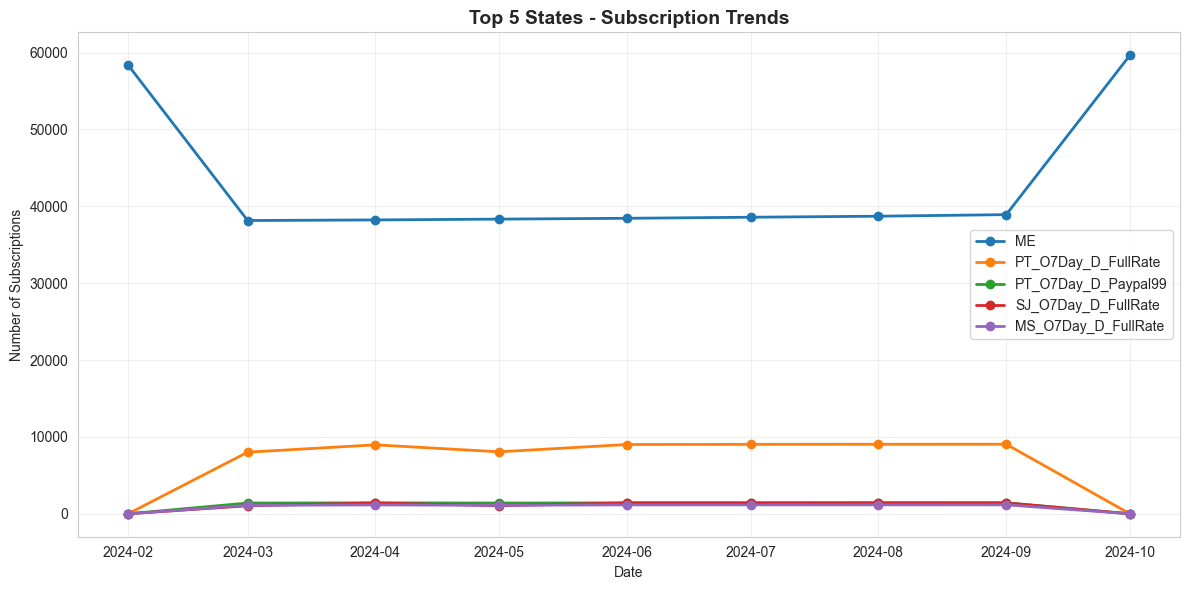

In [15]:
# Plot state comparison
plt.figure(figsize=(12, 6))
for state in top_states.index:
    plt.plot(state_ts.index, state_ts[state], marker='o', linewidth=2, label=state)

plt.title('Top 5 States - Subscription Trends', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Subscriptions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### New vs Existing Subscriptions

[2025-11-26 16:07:00,220] : Analyzing new vs existing subscriptions...:


New vs Existing Subscriptions:


,new_subscriptions,existing_subscriptions,total
date,,,
2024-02-01,10705,52134,62839
2024-03-01,2543,60434,62977
2024-04-01,3045,60061,63106
2024-05-01,2076,61209,63285
2024-06-01,2344,61140,63484
2024-07-01,1970,61767,63737
2024-08-01,1485,62490,63975
2024-09-01,1065,63312,64377
2024-10-01,2539,61973,64512


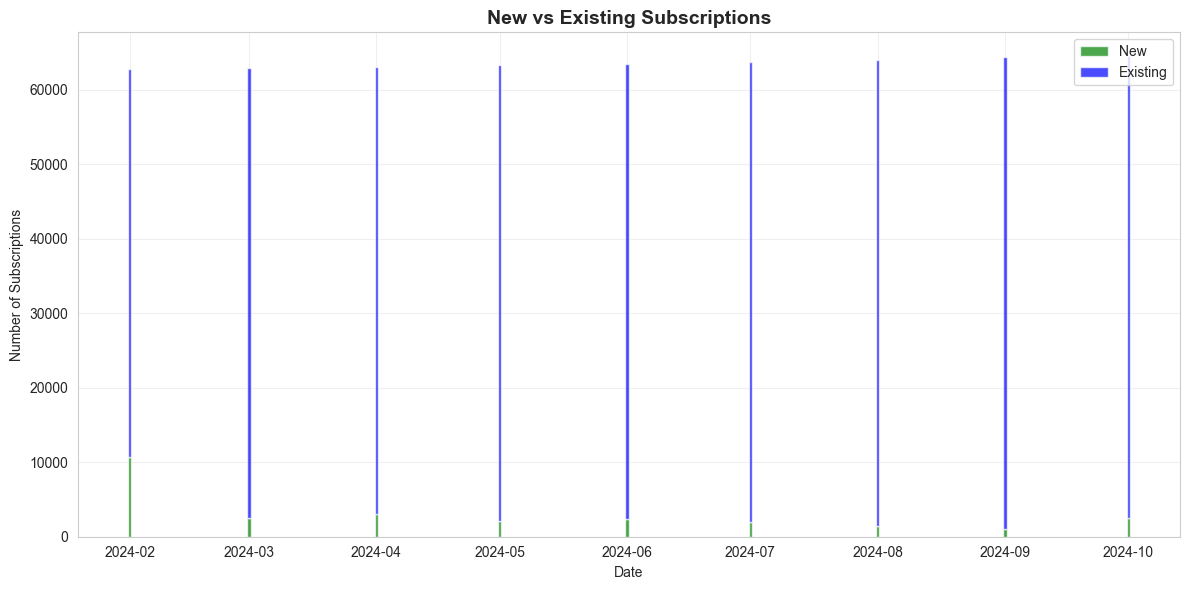

In [16]:
# Analyze new vs existing
new_vs_existing = analyzer.analyze_new_vs_existing()

if new_vs_existing is not None:
    print("New vs Existing Subscriptions:")
    display(new_vs_existing)
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.bar(new_vs_existing.index, new_vs_existing['new_subscriptions'], 
            label='New', alpha=0.7, color='green')
    plt.bar(new_vs_existing.index, new_vs_existing['existing_subscriptions'], 
            bottom=new_vs_existing['new_subscriptions'],
            label='Existing', alpha=0.7, color='blue')
    plt.title('New vs Existing Subscriptions', fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Number of Subscriptions')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("New vs Existing analysis not available (LastStartDate column required)")

## Export Results

In [ ]:
# Export daily stats to CSV
output_path = PROJECT_ROOT / 'outputs' / 'timeseries' / 'daily_stats.csv'
analyzer.ts_data.to_csv(output_path)
print(f"✅ Daily statistics exported to: {output_path}")